In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishabhkamboj2003","key":"eb07220f2fa10700dad3d2429f63b59b"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle competitions download -c tabular-playground-series-nov-2022

In [6]:
!mkdir train

In [ ]:
!unzip /content/tabular-playground-series-nov-2022.zip -d train

In [8]:
import os
import pandas as pd
from pathlib import Path
from sklearn.metrics import log_loss


s1 = pd.read_csv("/content/train/sample_submission.csv")
print("data is loaded successfully")

data is loaded successfully


In [9]:
s1.head()

,id,pred
0,20000,0.640707
1,20001,0.636904
2,20002,0.392496
3,20003,0.588658
4,20004,0.783603


In [10]:
# READING FIRST SUBMISSION FILE

S1 = pd.read_csv("/content/train/submission_files/0.6222863195.csv" , index_col = 'id')
print("data is loaded successfully!!")

data is loaded successfully!!


In [11]:
S1.head(10)

,pred
id,
0,0.709336
1,0.452988
2,0.675462
3,0.481046
4,0.957339
5,0.831414
6,0.716171
7,0.953687
8,0.427233


In [12]:
train_label = pd.read_csv("/content/train/train_labels.csv" , index_col = 'id')

train_label.head(10)

,label
id,
0,0
1,1
2,1
3,1
4,0
5,0
6,1
7,1
8,1


In [13]:
train_label.shape

(20000, 1)

In [14]:
train_label.value_counts()

label
0        10000
1        10000
dtype: int64

In [15]:
S1.shape

(40000, 1)

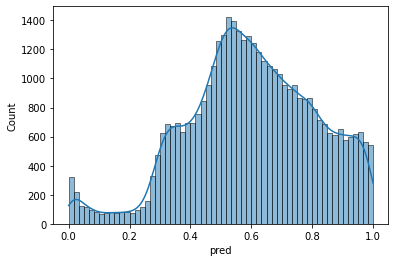

In [16]:
import seaborn as sns

sns.histplot(data = S1 , x = 'pred' , kde = True)

In [17]:
gt_ids = train_label.index

score = log_loss(train_label , S1.loc[gt_ids])
print(score)

0.6222863195129075


(40000, 1)


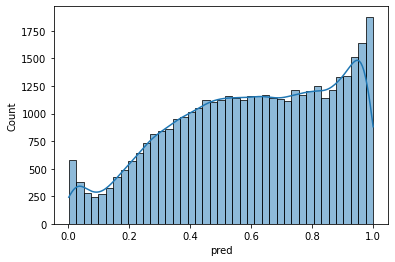

In [18]:
#READING SECOND SUBMISSION FILE

S2 = pd.read_csv("/content/train/submission_files/0.6223807245.csv" , index_col = 'id')

print(S2.shape)

sns.histplot(data = S2 , x = 'pred' , kde = True)

In [19]:
score = log_loss(train_label , S2.loc[gt_ids])

score

0.6223807245068153

In [20]:
S_avg = (S2*0.7+S1)/2

final_score = log_loss(train_label , S_avg.loc[gt_ids])
final_score


0.5854657274283646

In [59]:
# ENSEMBLING SUBMISSION FILES

import os
import numpy as np

import pandas as pd
from pathlib import Path
from sklearn.metrics import log_loss

path = Path('/content/train/submission_files')

files_list = os.listdir(path)

X = np.zeros((40000,5000))

for i,name in enumerate(sorted(files_list)):
  df = pd.read_csv(path/name , index_col = 'id')
  X[:,i] = df['pred'].values

df_sub = pd.DataFrame(X)


In [60]:
df_sub = pd.DataFrame(X,columns = sorted(os.listdir(path)))

df_sub.head()



,0.6222863195.csv,0.6223807245.csv,0.6225426578.csv,0.6247722291.csv,0.6253455681.csv,0.6254850917.csv,0.6255093621.csv,0.6260141578.csv,0.6263493693.csv,0.6272779211.csv,...,0.7519100517.csv,0.7519556278.csv,0.7520219713.csv,0.7521219579.csv,0.7522329272.csv,0.7523602310.csv,0.7526089604.csv,0.7526999358.csv,0.7551167673.csv,0.7575039918.csv
0,0.709336,0.799007,0.851891,0.537158,0.623930,0.705970,0.503437,0.633185,0.641550,0.666604,...,0.769207,0.750250,0.663370,0.739333,0.822384,0.749498,0.729800,0.867847,0.745888,0.787
1,0.452988,0.364453,0.567582,0.354468,0.513818,0.584119,0.454809,0.238501,0.472171,0.522314,...,0.640052,0.794052,0.721298,0.804369,0.620626,0.733606,0.816942,0.814229,0.598331,0.547
2,0.675462,0.842260,0.800013,0.525229,0.692071,0.715418,0.651008,0.609124,0.691198,0.609994,...,0.812841,0.779859,0.865657,0.828493,0.763010,0.802883,0.806891,0.896058,0.855776,0.667
3,0.481046,0.577118,0.683032,0.541356,0.630088,0.664514,0.413373,0.508210,0.526140,0.584565,...,0.824703,0.799698,0.800130,0.716604,0.603779,0.708499,0.844837,0.853057,0.850657,0.622
4,0.957339,0.910337,0.917322,0.874487,0.787595,0.854273,0.843846,0.876749,0.821128,0.913054,...,0.934803,0.900150,0.960911,0.906037,0.961240,0.935608,0.889757,0.978505,0.953681,0.934


In [23]:
columns_list = df_sub.columns

scores = {}

for i,name in enumerate(columns_list):
  scores[name] = log_loss(train_label.values , df_sub[name].values[:20000])



In [24]:
scores['0.6222863195.csv']


0.6222863195129075

In [25]:
df  = df_sub.sum(axis = 1)/5000

log_loss(train_label.values , df.values[:20000])

0.6807114338744499

In [26]:
df

0        0.775747
1        0.625426
2        0.800677
3        0.738851
4        0.935635
           ...   
39995    0.504354
39996    0.579523
39997    0.744931
39998    0.752907
39999    0.640842
Length: 40000, dtype: float64

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 30)
pca.fit(df_sub.values)

print("Variance Distribution :")
print(pca.explained_variance_ratio_.cumsum() * 100)

Variance Distribution :
[89.98189744 92.38869804 93.29868205 94.03825881 94.52368877 94.85735206
 95.07633284 95.24396416 95.38722865 95.50585235 95.61914731 95.7211295
 95.81094096 95.88829118 95.96353207 96.03485646 96.09573979 96.15245956
 96.20588506 96.25706782 96.30525012 96.35225299 96.39616657 96.43739362
 96.47758174 96.51594344 96.55302303 96.58866859 96.62239051 96.65482907]


In [28]:
X = pca.transform(df_sub.values)
X

array([[-4.81098796e+00, -1.91150424e+00, -8.69352799e-01, ...,
         8.30300050e-02,  1.28298228e-01, -7.37700245e-03],
       [ 6.08874761e+00, -2.54631001e+00,  1.65099726e+00, ...,
        -2.35954488e-01,  1.68847375e-01,  3.98542297e-01],
       [-6.52176708e+00,  4.16331423e-01, -6.22889101e-01, ...,
        -8.04656229e-02, -2.12733588e-01, -1.94104312e-01],
       ...,
       [-2.45637623e+00, -6.44009418e-02,  1.41375496e-01, ...,
        -4.48122800e-01, -2.24554113e-01, -1.84805922e-01],
       [-3.23309497e+00,  7.41889720e-01, -1.96538482e+00, ...,
        -1.60032397e-02,  9.44472967e-02,  2.92969914e-01],
       [ 4.76042623e+00, -4.21366310e-01, -9.69957213e-01, ...,
         1.97093678e-01, -1.65237942e-02,  2.22451761e-03]])

In [29]:
x_train = X[:15000,:]
y_train = train_label.values[:15000]

x_validation = X[15000 : 20000 , :]
y_validation = train_label.values[15000:20000]

x_test = X[20000:]

In [30]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C = 0.1 , solver = 'saga' , max_iter = 100)
log_clf.fit(x_train , y_train.ravel())

y_predict = log_clf.predict(x_train)
y_predict

array([1, 0, 1, ..., 1, 0, 0])

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_clf , x_train , y_train.ravel() , cv = 5 , scoring = 'accuracy')
scores

array([0.714     , 0.718     , 0.711     , 0.71833333, 0.71666667])

In [32]:
y_test = log_clf.predict_proba(x_test)
log_test = y_test[:,1]

log_test

array([0.57346627, 0.7029618 , 0.21704479, ..., 0.54386199, 0.45254084,
       0.44137685])

In [33]:
train_proba = log_clf.predict_proba(x_train)[:,1]

score = log_loss(y_train , train_proba)
score

0.5349827545426765

In [34]:
log_valprob = log_clf.predict_proba(x_validation)[:,1]

score = log_loss(y_validation , log_valprob)
score

0.5277687141273525

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(x_train , y_train.ravel())

y_predict = forest_clf.predict(x_train)

from sklearn.metrics import precision_score , recall_score

precision = precision_score(y_train.ravel() , y_predict)
precision

1.0

In [36]:
scores = cross_val_score(forest_clf , x_train , y_train.ravel() , cv = 5 , scoring = 'accuracy')
scores

array([0.72466667, 0.70966667, 0.704     , 0.712     , 0.711     ])

In [37]:
train_proba2 = forest_clf.predict_proba(x_train)
train_proba2[:,1]

score = log_loss(y_train , train_proba2[:,1])
score


0.15573130959753206

In [38]:
forest_valprob = forest_clf.predict_proba(x_validation)[:,1]

score = log_loss(y_validation , forest_valprob)
score

0.5399786350830206

In [39]:
def prob(model , data):
      test_proba2 = model.predict_proba(data)

      test_prob = test_proba2[:,1]
      return test_prob

prob(forest_clf , x_test)

array([0.52, 0.62, 0.21, ..., 0.53, 0.46, 0.45])

In [40]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train , y_train.ravel())

XGBClassifier()

In [41]:
train_proba2 = xgb_clf.predict_proba(x_train)
train_proba2[:,1]

score = log_loss(y_train , train_proba2[:,1])
score

0.5116918655912082

In [42]:
xg_valprob = xgb_clf.predict_proba(x_validation)[:,1]

score = log_loss(y_validation , xg_valprob)
score

0.5310395637320354

In [43]:
xg_test = prob(xgb_clf , x_test)
xg_test

array([0.6059352 , 0.611422  , 0.2948675 , ..., 0.5115644 , 0.42552808,
       0.41001514], dtype=float32)

In [44]:
from sklearn.neighbors import KNeighborsClassifier as KNC

ngb_clf = KNC(n_neighbors = 200)
ngb_clf.fit(x_train , y_train.ravel())



KNeighborsClassifier(n_neighbors=200)

In [45]:
train_proba2 = ngb_clf.predict_proba(x_train)
train_proba2[:,1]

score = log_loss(y_train , train_proba2[:,1])
score

0.5406011274144434

In [46]:
ng_valprob = ngb_clf.predict_proba(x_validation)[:,1]

score = log_loss(y_validation , ng_valprob)
score

0.5377303347287535

In [47]:
final_prob2 = 0.5*log_test + 0.5*xg_test
final_prob2

array([0.58970074, 0.6571919 , 0.25595614, ..., 0.52771318, 0.43903446,
       0.42569599])

In [49]:
final_valprob = 0.5*xg_valprob + 0.5*log_valprob 
final_valprob

val_score = log_loss(y_validation , final_valprob)
val_score

0.5278005321778393

In [61]:
submission = pd.DataFrame({'id':range(20000,40000) , 'pred' : final_prob2})
submission = submission.set_index('id')
submission.to_csv('submission_final.csv')
submission.head(10)

,pred
id,
20000,0.589701
20001,0.657192
20002,0.255956
20003,0.322406
20004,0.067598
20005,0.317117
20006,0.464657
20007,0.772500
20008,0.811271


In [51]:
# AVERAGING THE DIFFERENT MODEL PREDICTIONS
 
prob_sum = df_sub.sum(axis = 1)
prob_sum

avg_prob = prob_sum/5000

train_prob = avg_prob.loc[:20000-1]
train_prob

test_prob = avg_prob.loc[20000:]

In [52]:
train_prob

0        0.775747
1        0.625426
2        0.800677
3        0.738851
4        0.935635
           ...   
19995    0.890282
19996    0.683125
19997    0.910288
19998    0.719215
19999    0.961188
Length: 20000, dtype: float64

In [53]:
score = log_loss(train_label.values , train_prob)
score

0.6807114338744499

In [ ]:
#TAKING ONLY TOP 30 MODELS

df = pd.DataFrame(df_sub , columns = [name for name in columns_list[:30]])
df

In [55]:
prob_sum = df.sum(axis = 1)
prob_sum

avg_prob = prob_sum/30

train_prob = avg_prob.loc[:15000-1]
train_prob

validation_prob = avg_prob.loc[15000:20000-1]

test_prob = avg_prob.loc[20000:]
training_label = train_label.loc[:15000-1]
validation_label = train_label.loc[15000:20000-1]

In [56]:
train_score = log_loss(training_label , train_prob)
validation_score = log_loss(validation_label , validation_prob)

[train_score , validation_score]

[0.5998207162140446, 0.5908172857881789]

In [57]:
submission = pd.DataFrame({'id':range(20000,40000) , 'pred' : test_prob.values})
submission.to_csv('submission2.csv')
